# PanelJam Collaboration Graph

***PanelJam.com*** is a small online community of artists, on which cartoons are published. In particular each cartoon (also called jam) is made up by different panels drawn by distinct users: so it is the result of some artists collaboration.

**PanelJam artists can collaborate among them without being friends.**

This script analyzes and shows PanelJam collaboration graphs.

The used libraries are:
- ***pyplot***: pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation
- ***networkx***:  is a Python library for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
- ***pickle***: is a library which implements binary protocols for serializing and de-serializing a Python object structure.


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

First we de-serialize the file ***collaborationGraph.pckl*** to load the graph.

Just looking at the number of nodes (that represent the artists) and edges (that represent the collaboration between two artists) we could state than each node is connected to ~2.9 (8806/3038) edges in average. But let's see the graph..

In [3]:
file = open('collaborationGraph.pckl', 'rb')
collaborationGraph = pickle.load(file)
file.close()

print('Number of nodes/users: ', collaborationGraph.number_of_nodes())
print('Number of edges/collaboration: ', collaborationGraph.number_of_edges())
print('Edges for user in average: ', round(collaborationGraph.number_of_edges()/collaborationGraph.number_of_nodes(), 3))

Number of nodes/users:  3038
Number of edges/collaboration:  8806
Edges for user in average:  2.899


The collaboration graph is **undirected** and **weighted**: the weight of an edge represents the number of times the two related artists have collaborated. The collaboration graph shows a kind of circumference that represents the lackers and a connected component (larger than the one of the friendship graph) at the middle.

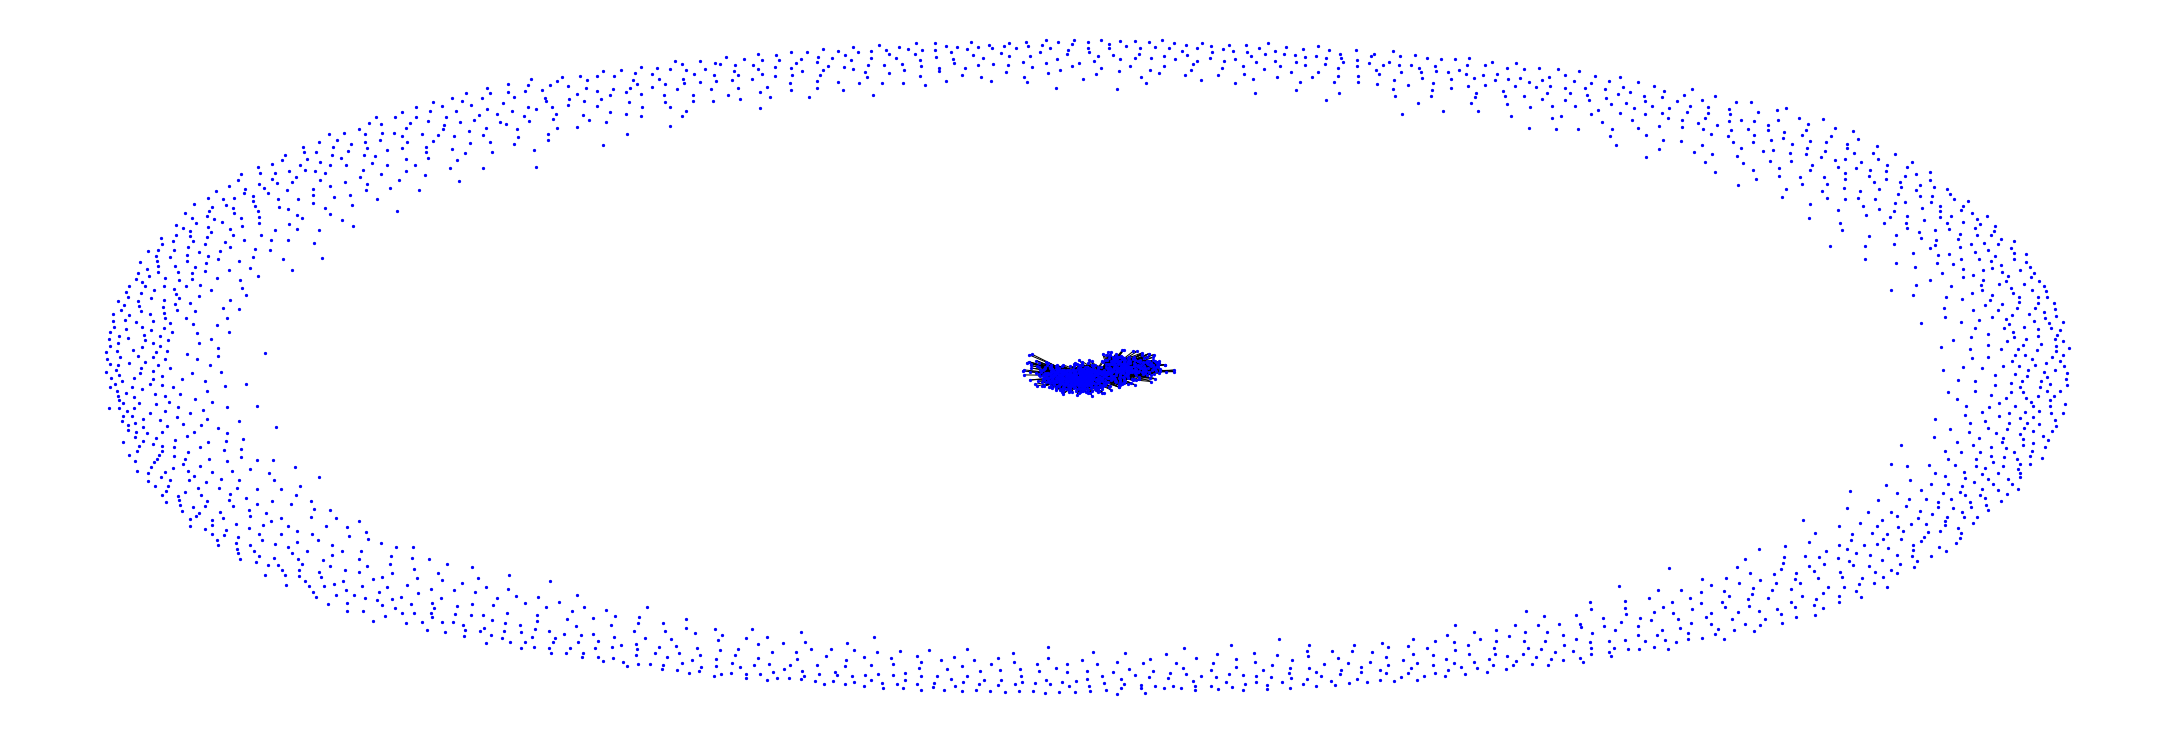

In [17]:
# Draw full graph
nodes_position = nx.spring_layout(collaborationGraph)
nx.draw(collaborationGraph, pos=nodes_position, node_color='b', node_size=5, with_labels=False)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

We can easily extract the connected component at the middle of the collaboration graph by the following code.

In [13]:
# Draw the most connected component
conn_comp = nx.connected_components(collaborationGraph)
subnet_nodes = max(conn_comp, key=len)
subnet = collaborationGraph.subgraph(subnet_nodes)

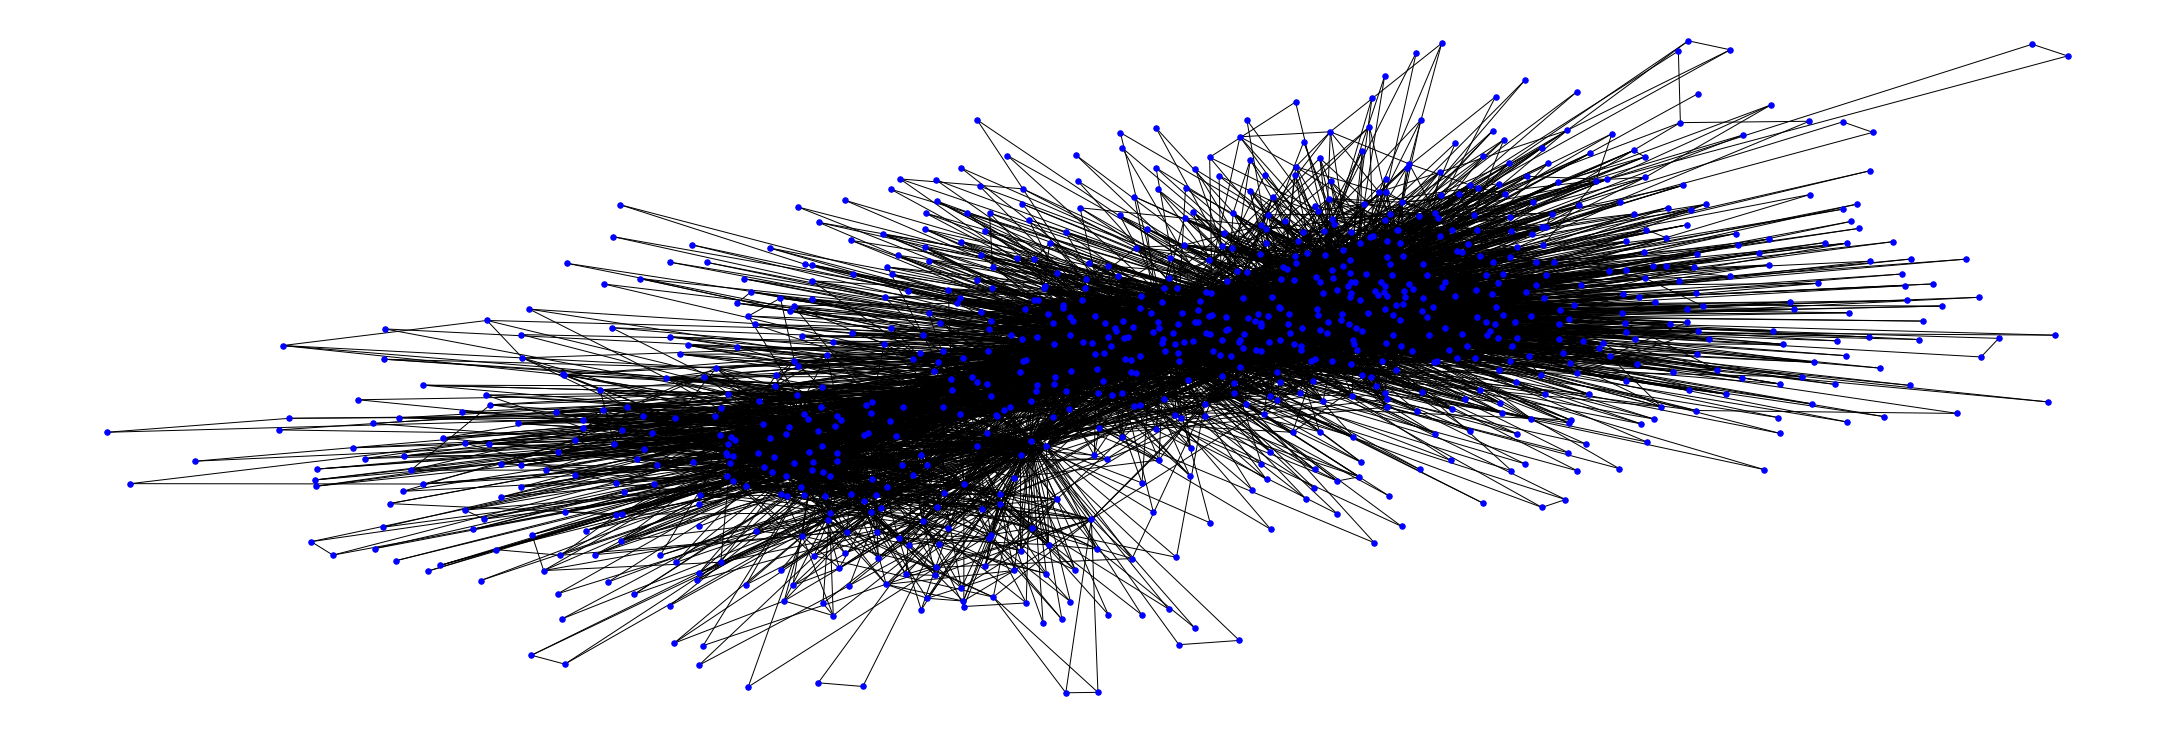

In [19]:
nodes_position = nx.spring_layout(subnet)
nx.draw(subnet, pos=nodes_position, node_color='b', node_size=30, with_labels=False)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

To emphatize the weights of the edges, we can extract a clique from the collaboration graph and plot it coloring the edges based on a color map.

In [27]:
# CLIQUE
cliques = sorted(list(nx.find_cliques(collaborationGraph)), key=lambda x: len(x), reverse=True)
clique_nodes = cliques[0]
clique = collaborationGraph.subgraph(clique_nodes)
weights = list((nx.get_edge_attributes(clique, 'weight')).values())

min_weight = min(weights)
max_weight = max(weights)


In [42]:
nodes_position = nx.spring_layout(clique)
color_map = plt.cm.Blues

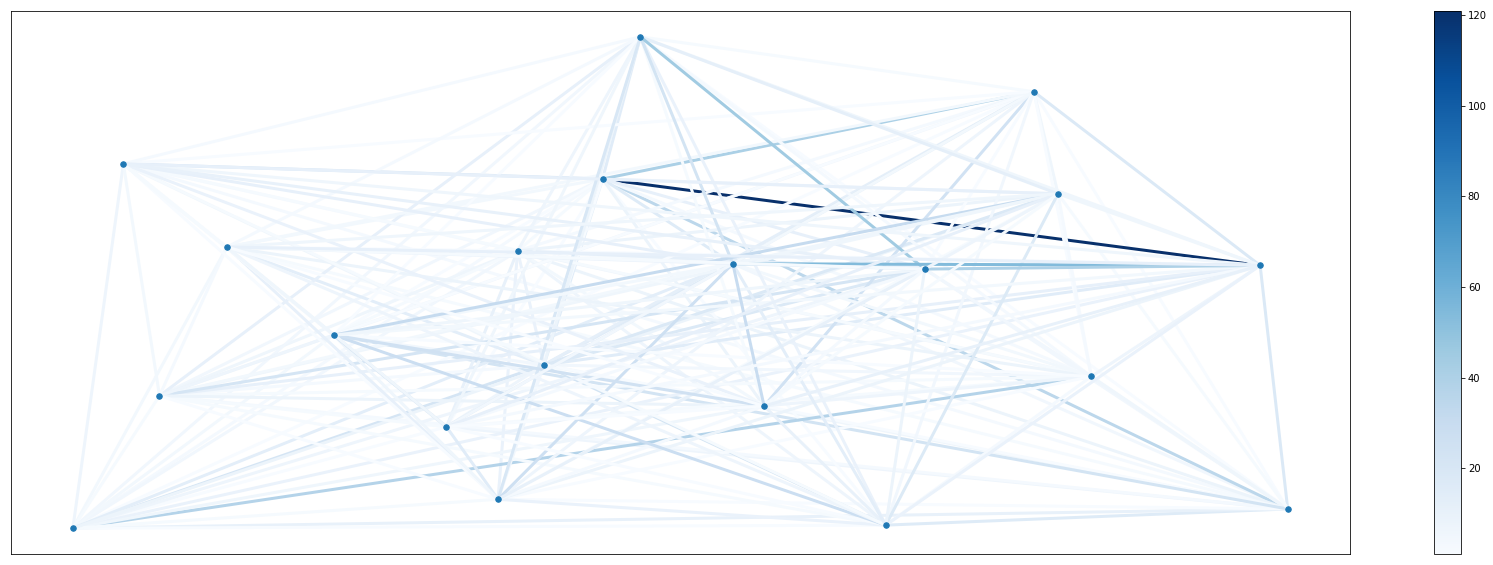

In [43]:
nx.draw_networkx_nodes(clique, nodes_position, clique_nodes, font_size=50, node_size=30)
nx.draw_networkx_edges(clique, nodes_position, edge_color=weights, edge_min=min_weight, edge_max=max_weight, width=3, edge_cmap=color_map)
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min_weight, vmax=max_weight))
sm._A = []
plt.colorbar(sm)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

We calculate the [closeness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.closeness_centrality.html) and the [betweenness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html). We use the closeness centrality to extract the top 5 cores and the betweenness centrality to extract the top 5 gatekeepers of the collaboration graph. In conclusion, we show the ego network of the first core.

In [39]:
# EGO NET
closeness = nx.closeness_centrality(collaborationGraph)
betweenness = nx.betweenness_centrality(collaborationGraph)

cores = sorted(closeness.items(), key=lambda x: x[1],  reverse=True)[:5]
print('Cores: ', cores)
gatekeepers = sorted(betweenness.items(), key=lambda x: x[1],  reverse=True)[:5]


Cores:  [('Juleefish%20', 0.16660979356760267), ('Mojomos', 0.16560672437092833), ('joshyouart', 0.1654075581359663), ('ironically%20horny', 0.16520887037844562), ('Potato%20Man', 0.1649117321223693)]


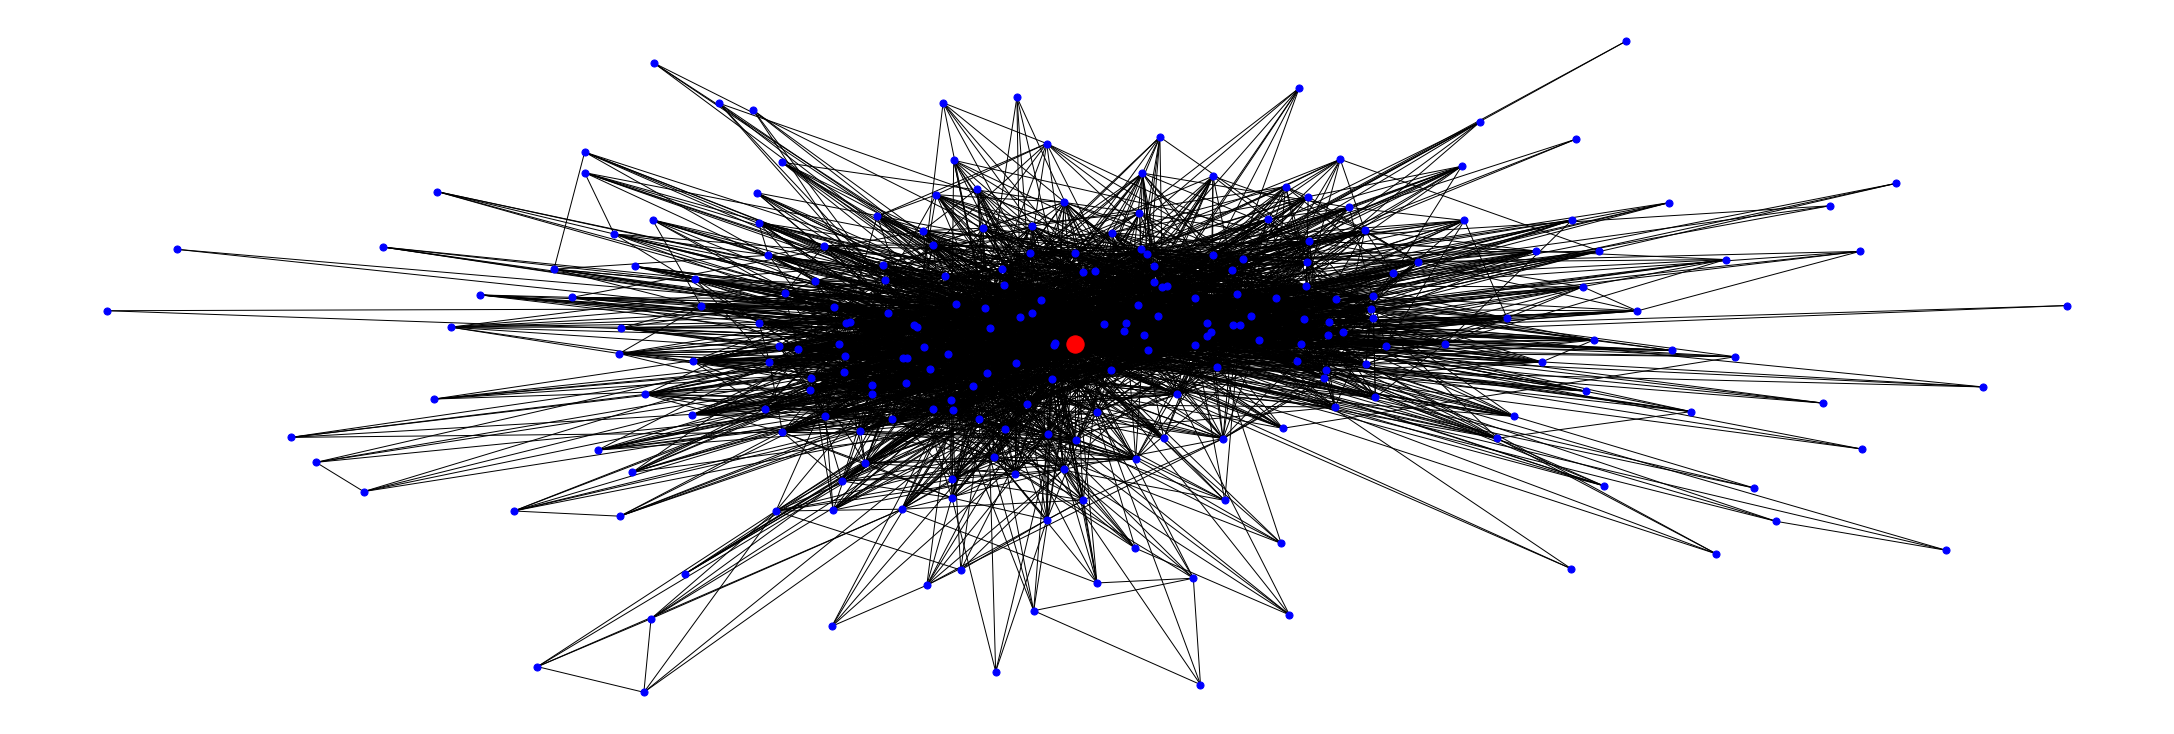

In [41]:
ego = cores[0][0]
ego_net = nx.ego_graph(collaborationGraph, ego)

pos = nx.spring_layout(ego_net)
nx.draw(ego_net, pos, node_color='b', node_size=50, with_labels=False)
nx.draw_networkx_nodes(ego_net, pos, nodelist=[ego], node_size=300, node_color='r')
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()